# EDA with Hypothesis Testing

# Creator: Shireen khan

# Project Title: Health Insurance Cost EDA & Hypothesis Testing



# Domain: Medical Research

# Dataset Source: Kaggle

# About the dataset: This dataset contains 7 columns and 1338 rows.
# Columns names: Age, Sex, BMI, Children, Smoker, Region, Charges


# Objective:
This project aims to analyze key factors influencing health insurance charges—such as age, sex, BMI, number of children, smoking status, and region. Through statistical hypothesis testing, feature engineering, and advanced visualization techniques, I will try to uncover data patterns and test the statements or assumptions about the data or relationships between variables through EDA and Hypothesis Testing.



# 1. EDA

# **Import all the necessary libraries...**

In [222]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
df = pd.read_csv("/content/drive/My Drive/Datasets/insurance.csv")

# **Print the data...**

In [225]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Check the columns and rows no.**

In [226]:
print("Rows in df:",df.shape[0])
print("Columns in df:",df.shape[1])

Rows in df: 1338
Columns in df: 7


# **Check the null values**

In [227]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Check the Duplicates and Drop it...**

In [228]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [229]:
df.shape

(1338, 7)

It has still 1338 raws ans 7 columns means no duplicates values...

# **Check the Datatypes of the columns...**

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Each and every column is in correct Dtype...

# **Check the statistical summary of the df**

In [231]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Checking the outliers in BMI column**

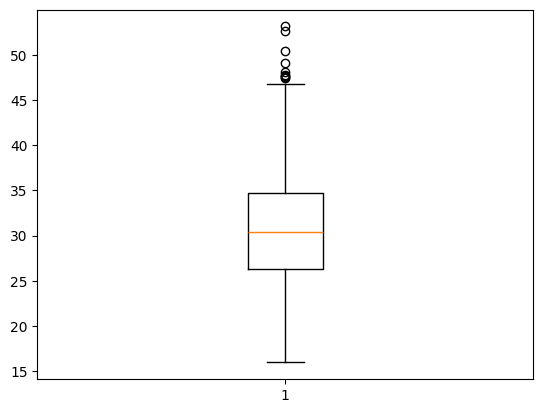

In [232]:
plt.boxplot(df["bmi"])
plt.show()

# **IQR method**

In [233]:
q1 = df["bmi"].quantile(0.25)  # 25th percentile
q3 = df["bmi"].quantile(0.75)  # 75th percentile

In [234]:
print("Q1:",q1,"\nQ3:", q3)

Q1: 26.29625 
Q3: 34.69375


In [235]:
# IQR
iqr = q3-q1

In [236]:
print("IQR:",iqr)

IQR: 8.3975


In [237]:
lower_limit = q1 - ( 1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print("lower_limit:",lower_limit)
print("upper_limit:", upper_limit)


lower_limit: 13.7
upper_limit: 47.290000000000006


In [238]:
# Check the outliers...
outliers = df[(df["bmi"] < lower_limit) | (df["bmi"] > upper_limit)]
print(outliers)
print("\nTotal Outliers in df are:",outliers.shape[0])

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

Total Outliers in df are: 9


# **Handling the Outliers**

# Capping

In [239]:
df["bmi"] = np.where(
    df["bmi"] > upper_limit, upper_limit,
    np.where(
        df["bmi"] < lower_limit, lower_limit, df["bmi"]))

After capping df has 0 outliers...

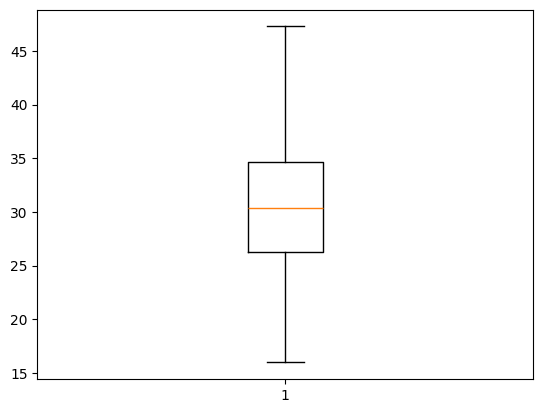

In [240]:
plt.boxplot(df["bmi"])
plt.show()

# **Feature Engineering**

## In BMI column...

BMI means body mass index = weight/height.

if bmi < 18.5 so, you are "Under weight"

if bmi >= 18.5 and bmi <= 24.9 so, you are "Normal"

if bmi > 24.9 and bmi <= 29.9 so, you are "Overweight"

if bmi > 29.9 so, you have "Obesity"



In [241]:
# Creating a function...
def bmi_group(value):
  if value < 18.5:
    return "Under weight"
  elif value >= 18.5 and value <= 24.9:
    return "Normal"
  elif value > 24.9 and value <= 29.9:
    return "Overweight"
  else :
    return "Obesity"

In [242]:
# Apply this function on bmi column to extract new feature....
df["Weight"] = df["bmi"].apply(bmi_group)

In [243]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight
356,46,male,43.89,3,no,southeast,8944.11510,Obesity
242,55,female,26.80,1,no,southwest,35160.13457,Overweight
829,39,male,21.85,1,no,northwest,6117.49450,Normal
1187,62,female,32.68,0,no,northwest,13844.79720,Obesity
714,24,female,22.60,0,no,southwest,2457.50200,Normal


## In Age column...
age < 20 so, you are a "Teenager"

age >= 20 and age < 40 so, you are an "Adult"

age >= 40 so, you are a "Senior"


In [244]:
# Creating a function...
def age_group(num):
  if num < 20 :
    return "Teenager"
  elif num >= 20 and num < 40:
    return "Adult"
  else :
    return "Senior"

In [245]:
df["Age_Group"] = df["age"].apply(age_group)

In [246]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight,Age_Group
478,21,male,36.85,0,no,southeast,1534.3045,Obesity,Adult
728,18,female,40.28,0,no,northeast,2217.6012,Obesity,Teenager
1292,21,male,23.21,0,no,southeast,1515.3449,Normal,Adult
83,48,female,41.23,4,no,northwest,11033.6617,Obesity,Senior
52,48,male,28.00,1,yes,southwest,23568.2720,Overweight,Senior


## IN Children column...
if children num == 0, means 'No Family'

if chidren num == 1, means "Small Family"

if chidren num == 2, means "Medium Family"

if chidren num > 2, means "Large Family"


In [247]:
# Creating a function...
def family(num):
  if num == 0 :
    return "No child"
  elif num == 1:
    return "Small"
  elif num == 2 :
    return "Medium"
  else :
    return "Large"

In [248]:
df["Family"] = df["children"].apply(family)

In [249]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight,Age_Group,Family
396,43,female,34.40,3,no,southwest,8522.0030,Obesity,Senior,Large
584,19,male,20.70,0,no,southwest,1242.8160,Normal,Teenager,No child
562,27,male,30.50,0,no,southwest,2494.0220,Obesity,Adult,No child
711,50,female,23.54,2,no,southeast,10107.2206,Normal,Senior,Medium
193,56,female,26.60,1,no,northwest,12044.3420,Overweight,Senior,Small


## BMI and Age ratio

In [250]:
df["bmi_age_ratio"] = (df["bmi"] / df["age"]).round(2)

In [251]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight,Age_Group,Family,bmi_age_ratio
737,26,male,23.70,2,no,southwest,3484.3310,Normal,Adult,Medium,0.91
203,27,female,36.08,0,yes,southeast,37133.8982,Obesity,Adult,No child,1.34
638,39,male,26.41,0,yes,northeast,20149.3229,Overweight,Adult,No child,0.68
1234,45,female,27.83,2,no,southeast,8515.7587,Overweight,Senior,Medium,0.62
1119,30,female,19.95,3,no,northwest,5693.4305,Normal,Adult,Large,0.66


## Health status
if bmi/age <= 0.6, means you are "Healthy"

if bmi/age > 0.6  and  bmi/age <= 0.8, means you are "At risk"

if bmi/age > 0.8, means you are "Unhealthy"

In [252]:
def health_sta(value):
  if value <= 0.6:
    return "Healthy"
  elif value >0.6 and value <= 0.8:
    return "At risk"
  else:
    return "Unhealthy"

In [253]:
df["H_status"] = df["bmi_age_ratio"].apply(health_sta)

In [254]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight,Age_Group,Family,bmi_age_ratio,H_status
708,31,female,30.495,3,no,northeast,6113.23105,Obesity,Adult,Large,0.98,Unhealthy
1234,45,female,27.830,2,no,southeast,8515.75870,Overweight,Senior,Medium,0.62,At risk
160,42,female,26.600,0,yes,northwest,21348.70600,Overweight,Senior,No child,0.63,At risk
1310,42,male,26.315,1,no,northwest,6940.90985,Overweight,Senior,Small,0.63,At risk
703,34,female,26.410,1,no,northwest,5385.33790,Overweight,Adult,Small,0.78,At risk


In [255]:
df.shape

(1338, 12)

So, through the Feature extraction/transformation now, df has 12 columns...

In [256]:
copy_df = df.copy()

# **2. Data Analysis and Visualization**

## Bivariate and Multivariate anaysis

## **'BMI vs Age Scatter Plot by Sex'**

In [257]:
fig = px.scatter(df, x='age', y='bmi', color='sex',
                 title='BMI vs Age Scatter Plot by Sex',
                 labels={'age': 'Age', 'bmi': 'BMI', 'sex': 'Sex'})
fig.show()

## Conclusion:
In this dataset we have almost similar no. of males and females and males have a little bit higher value of BMI rather then females. Most of the peoples have BMI value in range of 25 to 40.

## **'Number of Children by Sex'**

In [258]:
child_gender = df.groupby(['sex', 'children']).size().reset_index(name='count')

fig = px.bar(child_gender, x='children', y='count', color='sex',
             barmode='group',
             title='Number of Children by Sex',
             labels={'children':'Number of Children', 'count':'Number of Individuals', 'sex':'Sex'})
fig.show()

In [259]:
child_gender

,sex,children,count
0,female,0,289
1,female,1,158
2,female,2,119
3,female,3,77
4,female,4,11
5,female,5,8
6,male,0,285
7,male,1,166
8,male,2,121
9,male,3,80


## Conclusion:
So we can easily see that how many individuals(males/females) have how many childrens(0,1,2....)

## **'Distribution of Number of Children by Sex and Age'**

In [260]:
data = df.groupby(['sex', 'age', 'children']).size().reset_index(name='count')
fig = px.bar(data, x='age', y='count', color='sex', barmode='group',
             facet_col='children',
             title='Distribution of Number of Children by Sex and Age',
             labels={'age': 'Age', 'count': 'Number of Individuals', 'sex': 'Sex', 'children': 'Number of Children'})

fig.show()

In [261]:
data

,sex,age,children,count
0,female,18,0,27
1,female,18,1,2
2,female,18,2,2
3,female,18,3,1
4,female,18,4,1
...,...,...,...,...
380,male,63,1,1
381,male,63,3,3
382,male,64,0,7
383,male,64,1,2


## Conclusion:
 There are 28 males with age 19 and 27 females with age 18 have 0 childrens.

 Some peoples with age 20-50 have 5 childrens. Males have more number than females.

 Some peoples with age 20-60 have 4 childrens


## **'Number of children by Smokig and Gender'**

In [262]:
data2 = df.groupby(["smoker","sex","children"]).size().reset_index(name='count')

In [263]:
data2

,smoker,sex,children,count
0,no,female,0,236
1,no,female,1,133
2,no,female,2,97
3,no,female,3,63
4,no,female,4,11
5,no,female,5,7
6,no,male,0,223
7,no,male,1,130
8,no,male,2,88
9,no,male,3,55


In [264]:
fig = px.bar(data2, x= 'children', y = 'count', color='sex',
             barmode='group',
             facet_col='smoker',
             title='Number of children by Smokig and Gender',
             labels={"children":"Children","count":"No. of Individuals","smoker":'Smoker',"sex":"Sex"},
             color_discrete_map={'female': 'pink', 'male': 'skyblue'})
fig.show()

## Conclusion:
There are more non-smokers than smokers.

There are 236 non-smokers females 223 non-smokers males with 0 childrens.

There are more non-smokers males/females with 5 childrens than smokers males/females.

Among smokers there are more males/females with Zero children then others.


# **Analysis Insurance charges with other factors...**

## **'Average Insurance Charges by Number of Children'**

In [265]:
data3 = df.groupby("children",as_index=False)["charges"].mean()

In [266]:
data3

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [267]:
fig = px.line(data3, x ='children', y ='charges',markers=True,
                 title="Average Insurance Charges by Number of Children",
                 labels={"children":'No. of Child',"charges":"Average Charges"},line_shape='linear')

fig.update_traces(marker=dict(color='green', size=10), line=dict(color='blue'))
fig.show()

## Conclusion:
Peoples with 3 childrens have the highest average insurance charges around 15k.

Peoples with 5 childrens have minimun average insurance charges around 8k.

So, There is a non-linear relationship. It means children factor doesn't affect the insurance charges.


## **'Average Insurance Charges with Age'**

In [268]:
data4 = df.groupby("age",as_index=False)["charges"].mean()

In [269]:
fig = px.scatter(data4, x = "age", y="charges",
                 title="Average Insurance Charges with Age",trendline='ols',
                 labels={"age":"AGE","charges":"Avg Insurance Charges"},color="age")
fig.show()

## Conclusion:
There is a linear relationship b/w 'age' and 'avg.insurance charges'.

Peoples with age > 60 have High Avg. Charges around 20k-23k.

Peoples with age < 20 have Low Avg. Charges around 5k-10k.

So, Age is having an positive impact on insurance charges.


## **"Average Insurance Charges with BMI"**

In [270]:
data5 = df.groupby("bmi",as_index=False)["charges"].mean()

In [271]:
data5

,bmi,charges
0,15.960,1694.796400
1,16.815,4904.000350
2,17.195,14455.644050
3,17.290,7813.353433
4,17.385,2775.192150
...,...,...
535,46.200,45863.205000
536,46.530,4683.025700
537,46.700,11538.421000
538,46.750,12592.534500


In [272]:
fig = px.scatter(data5, x = "bmi", y="charges",
                 title="Average Insurance Charges with BMI",
                 labels={"bmi":"BMI","charges":"Avg Insurance Charges"},color="bmi")
fig.show()

## Conclusion:
If the BMI > 30 so, avg. insurance charges are High around 45k-51k.

Many peoples have BMI > 30.

There is not too much impact of BMI on AIC but, we can say that if your BMI is high so, there are some chances that the AIC will be increase.

## "BMI_AGE_RATIO with AVG. Insurance Charges"

In [273]:
data6 = df.groupby("bmi_age_ratio",as_index=False)["charges"].mean()

In [274]:
from matplotlib.markers import MarkerStyle
fig = px.line(
    data6,
    x='bmi_age_ratio',
    y='charges',
    markers=True,
    title='Average Insurance Charges by BMI/AGE Ratio',
    labels={'bmi_age_ratio': 'BMI/Age Ratio (bins)', 'charges': 'Avg. Charges'}
)
fig.update_traces(line=dict(color='hotpink'))
fig.show()

## Conclusion:
If BMI/AGE will increase so the AIC will be increase.

BMI/AGE has an slightly positive impact on Avg. insurance charges.

## **'Avg. Insurance charges by Weight'**

In [275]:
data7 = df.groupby('Weight',as_index=False)["charges"].mean()

In [276]:
data7

,Weight,charges
0,Normal,10379.499732
1,Obesity,15491.542238
2,Overweight,11006.809989
3,Under weight,8852.200585


In [277]:
fig = px.pie(data7, names='Weight', values='charges',
                 title ='Avg. Insurance charges by Weight',
                 color = 'Weight')
fig.show()

## Conclusion:
Overweight (11k) and Obesity (15k), is associated with higher charges.

## **'Avg. Insurance charges by smoker'**

In [278]:
data8 = df.groupby('smoker',as_index=False)["charges"].mean()

In [279]:
data8

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [280]:
fig = px.bar(data8, x='smoker', y = 'charges',
                 title ='Avg. Insurance charges by smoker',
                 labels ={"smoker":"Smokert","charges":"Avg.Insurance Charges"},
                 color = 'smoker')
fig.show()

## Conclusion:

Smoking have a huge impact.

Somkers have High AIC around 32k.

And Non Smokers have Low AIC around 8k.

## **'Avg. Insurance Charges By Sex'**

In [281]:
data9 = df.groupby("sex",as_index=False)["charges"].mean()

In [282]:
data9

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [283]:
fig = px.pie(data9 , names='sex', values='charges',
             title='Avg. Insurance Charges By Sex',
             color ="sex")
fig.show()

## Conclusion:
Males have higher AIC(14k) than females(12k).

## **Correlation Heatmap**

In [284]:
corr = df.corr(numeric_only=True)

In [285]:
corr

,age,bmi,children,charges,bmi_age_ratio
age,1.000000,0.111930,0.042469,0.299008,-0.822827
bmi,0.111930,1.000000,0.013700,0.198997,0.361294
children,0.042469,0.013700,1.000000,0.067998,-0.119414
charges,0.299008,0.198997,0.067998,1.000000,-0.160467
bmi_age_ratio,-0.822827,0.361294,-0.119414,-0.160467,1.000000


In [286]:
fig = px.imshow(corr,
                title='Correlation Heatmap',
                aspect="auto")
fig.show()

Now performing correlation for charges by all the features...

In [287]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [288]:
numeric_cols = ['age', 'bmi', 'children', 'charges','bmi_age_ratio']
categorical_cols = ['sex', 'smoker', 'region','Weight', 'Age_Group', 'Family', 'H_status']


In [289]:
ct = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

In [290]:
transformed_data = ct.fit_transform(df)

In [291]:
transformed_data.shape

(1338, 27)

In [292]:
num_features = [f"{c}_scaled" for c in numeric_cols]
cat_features = ct.named_transformers_['cat'].get_feature_names_out(categorical_cols)
other_cols = [col for col in df.columns if col not in numeric_cols + categorical_cols]
all_features = num_features + list(cat_features) + other_cols

In [293]:
all_features

['age_scaled',
 'bmi_scaled',
 'children_scaled',
 'charges_scaled',
 'bmi_age_ratio_scaled',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'Weight_Normal',
 'Weight_Obesity',
 'Weight_Overweight',
 'Weight_Under weight',
 'Age_Group_Adult',
 'Age_Group_Senior',
 'Age_Group_Teenager',
 'Family_Large',
 'Family_Medium',
 'Family_No child',
 'Family_Small',
 'H_status_At risk',
 'H_status_Healthy',
 'H_status_Unhealthy']

In [294]:
df_transformed = pd.DataFrame(transformed_data, columns=all_features, index=df.index)

In [295]:
df_transformed.sample(5)

,age_scaled,bmi_scaled,children_scaled,charges_scaled,bmi_age_ratio_scaled,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,...,Age_Group_Adult,Age_Group_Senior,Age_Group_Teenager,Family_Large,Family_Medium,Family_No child,Family_Small,H_status_At risk,H_status_Healthy,H_status_Unhealthy
539,0.982076,0.115608,-0.908614,1.162747,-0.766827,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73,1.338082,0.224615,-0.078767,-0.109355,-0.865274,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
61,-1.011557,0.497132,2.410772,-0.724115,1.103666,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
168,-1.438764,0.194060,-0.078767,-0.871600,1.915854,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
795,-0.869155,-0.355104,-0.908614,0.416367,0.389925,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [296]:
corr = df_transformed.corr()
corr_charges = corr[['charges_scaled']]

In [297]:
fig = px.imshow(corr_charges.T,
                labels=dict(x="Columns", y="Correlation with Charges", color="Correlation"),
                title='Correlation Heatmap',
                aspect="auto")
fig.show()

In [298]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,Weight,Age_Group,Family,bmi_age_ratio,H_status
779,53,male,28.880,0,no,northwest,9869.81020,Overweight,Senior,No child,0.54,Healthy
380,27,female,17.955,2,yes,northeast,15006.57945,Under weight,Adult,Medium,0.66,At risk
479,23,male,32.560,0,no,southeast,1824.28540,Obesity,Adult,No child,1.42,Unhealthy
454,32,male,46.530,2,no,southeast,4686.38870,Obesity,Adult,Medium,1.45,Unhealthy
229,47,male,25.460,2,no,northeast,9225.25640,Overweight,Senior,Medium,0.54,Healthy


# **3. Hypothesis Testing**

## 1st Hypothesis:


Null Hypothesis(H0): The average insurance charges are less than 16,000 for people with high BMI.

Alternative Hypothesis(H1): The average insurance charges are greater than 16,000 for people with high BMI.

BMI threshold : bmi > 30

Creating a bmi group with their charges for bmi > 30.

In [299]:
sample_bmi = df[df["bmi"] >30]["charges"]

In [300]:
print("Totalno:",len(sample_bmi))

Totalno: 705


In [301]:
from scipy.stats import ttest_1samp

In [302]:
# Extract the sample from 705 (total Population)...
sample = sample_bmi.sample(200,random_state=42)

In [303]:
len(sample)

200

In [304]:
sample

,charges
867,11576.13000
166,4830.63000
155,6948.70080
399,1631.66830
588,13635.63790
...,...
558,39983.42595
185,43753.33705
18,10602.38500
179,8538.28845


In [305]:
t_stat , p_value = ttest_1samp(sample , 16000)  # it takes two values: sample and mean

if sample.mean() > 16000:
    p_value /= 2
print(f"Mean:{sample.mean()}, p_Value:{p_value}")


Mean:15890.107830699999, p_Value:0.9138392570493516


In [306]:
if p_value < 0.05:
  print("We reject the Null hypothesis.")
else:
  print("We failed to reject the Null hypothesis.")

We failed to reject the Null hypothesis.


## Conclusion:
* If we are comparing mean charges for one group (BMI > 30) with a fixed value (16,000) so, One-sample t-test is best. So, I performed one sample t-test.

* It is a one tailed T-test bczz we are taking AIC > 16k but null hypothesis will be against it and it will say that AIC < 16k. So, It is an One tail T-test.

* I got a p-value = 0.91 > 0.05, It means we are accepting null hypothesis.

* It mans Avg. insurance charges for High BMI is not greater than 16K, it is less then 16k.

# **2nd Hypothesis**

## Do adults and seniors pay different average charges?



* Null hypothesis(H0): The average charges for adults and seniors are similor.
* Alternative hypothesis(H1): adults and seniors pay different average charges.

In [307]:
# Create Two Diffrenet Groups...[One for Adults and one for Seniors]
adult = df[df["age"] < 40]["charges"]
senior = df[df["age"] >= 40]["charges"]

In [308]:
print(f'Size of adult population:{len(adult)}')
print(f'Size of senior population:{len(senior)}')

Size of adult population:674
Size of senior population:664


In [309]:
# we are taking sample size of 300 peoples in each group....
sample_adult = adult.sample(300,random_state=42)
sample_senior = senior.sample(300,random_state=42)

In [310]:
sample_adult.sample(5)

,charges
505,6796.86325
136,1261.44200
1277,4357.04365
429,18804.75240
1320,5425.02335


In [311]:
sample_senior.sample(5)

,charges
1193,8671.19125
704,8930.93455
1230,60021.39897
100,6186.12700
239,7152.67140


In [312]:
# Check the Variance is equal or not when we perform (two sample t-test)...
from scipy.stats import levene
# convert the arrays into list...
adult_list = sample_adult.tolist()
senior_list = sample_senior.tolist()
# perform levene test...
lev_test = levene(adult_list,senior_list)
print(lev_test)

LeveneResult(statistic=np.float64(0.02517143085532059), pvalue=np.float64(0.8739942033277925))


* if the p-value > 0.05, means variance is similor of both the groups else variance is not similor of both the groups.

* In this case p-value = 0.87 means > 0.05 , so the variance is similor of both the groups.

In [313]:
# Now performing two sample t-test...
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(sample_adult,sample_senior)
print(f't_statistic_value:{t_stat},p_value:{p_value}')

t_statistic_value:-6.2472268957758565,p_value:7.936463326970822e-10


p-value is equal to 7.94×10^ −10  is much smaller than 0.05.

In [314]:
if p_value < 0.05:
  print("We are rejecting null hypothesis.")
else:
  print("We failed to reject null hypothesis.")

We are rejecting null hypothesis.


In [315]:
print(f"sample_adult mean is: {sample_adult.mean()}")

sample_adult mean is: 10255.7782149


In [316]:
print(f"sample_senior mean is: {sample_senior.mean()}")

sample_senior mean is: 16108.42345436666


## Conclusion:
* We are accecpting Alternative hypothesis and rejecting Null hypothesis.

* We are using two sample t-test, because we have two groups and we are checking the avg. mean charges for both the groups, that both the groups pay different average charges.

* We performed t-test and got a p-value with is equal to [7.94×10^ −10].

* p-value <<< 0.05, indicates that we are strongly rejecting Null hypothesis.

* It means adults and seniors pay different average insurance charges.

# **3rd Hypothesis**

* Null Hypothesis(H0): Mean charges do not different by smoker status, region, or their interaction.

* Alternative hypothesis(H1): Smoker status and region both affect mean charges.

In [317]:
# Two-Way ANOVA Test...
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [318]:
model = ols('charges ~ C(smoker)* C(region)',data=df).fit()
anova_table= sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df            F         PR(>F)
C(smoker)            1.203267e+11     1.0  2191.337326  1.751867e-283
C(region)            1.075232e+08     3.0     0.652722   5.812827e-01
C(smoker):C(region)  1.416292e+09     3.0     8.597631   1.181560e-05
Residual             7.303050e+10  1330.0          NaN            NaN


* C(smoker): PR(>F) value is p-value (1.75 * 10^-283) for main effect of smoker.

* C(region): PR(>F) value is p-value (0.581) for main effect of region.

* C(smoker):C(region): PR(>F) value is p-value (1.18 * 10^-5) for the interaction between smoker and region.

In [319]:
p_val = 1.181560e-05
if p_val < 0.05:
  print("we are rejecting H0")
else:
  print("We are accepting H0")

we are rejecting H0


## **Conclusion:**

* smoker feature has a significant effect on avg. insurance charges with p-value (1.75 * 10^-283) <<< 0.05.

* region feature doesn't have a significant effect on avg. insurance charges because p-value (0.581) > 0.05.

* interaction between smoker status and region with p-value (1.18 * 10^-5) << 0.05, meaning that the effect of smoker status on charges depends on region.

* "This means smoking’s impact varies by region, but region by itself does not have an independent effect on avg. insurance charges.”

## Visualization:

In [320]:
avg_smok_reg = df.groupby(["smoker",'region'])["charges"].mean().reset_index()

In [321]:
avg_smok_reg

,smoker,region,charges
0,no,northeast,9165.531672
1,no,northwest,8556.463715
2,no,southeast,8032.216309
3,no,southwest,8019.284513
4,yes,northeast,29673.536473
5,yes,northwest,30192.003182
6,yes,southeast,34844.996824
7,yes,southwest,32269.063494


In [322]:
fig = px.bar(
    avg_smok_reg,
    x='region',
    y='charges',
    color='smoker',
    barmode='group',
    labels={'charges':'Average Insurance Charges', 'region':'Region', 'smoker':'Smoker Status'},
    title='Avg. Insurance Charges by Smoking Status & Region'
)
fig.show()

* smoker status and its interaction with region significantly affect mean insurance charges, while region alone does not affect it. This means smoking’s impact varies by region, but region by itself does not have an independent effect.”

End of the project

Thank you